In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('AmesHousing.csv')
# sum_col = df.isnull().sum()
# print(sum_col.loc[sum_col.values > 400])
print(df.shape)
df = df[["Overall Qual", "Gr Liv Area", "Garage Area", "Year Built", "Neighborhood", "SalePrice"]].copy()
print(df.shape)
df.head()

(2930, 82)
(2930, 6)


,Overall Qual,Gr Liv Area,Garage Area,Year Built,Neighborhood,SalePrice
0,6,1656,528.0,1960,NAmes,215000
1,5,896,730.0,1961,NAmes,105000
2,6,1329,312.0,1958,NAmes,172000
3,7,2110,522.0,1968,NAmes,244000
4,5,1629,482.0,1997,Gilbert,189900


In [3]:
# One-hot encoding for Categorical(Nominal) Features
df = pd.get_dummies(df, drop_first=True)
print(df.shape)
df.head()

(2930, 32)


,Overall Qual,Gr Liv Area,Garage Area,Year Built,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,6,1656,528.0,1960,215000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,896,730.0,1961,105000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1329,312.0,1958,172000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,2110,522.0,1968,244000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1629,482.0,1997,189900,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# missing value
# imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
# df = pd.DataFrame(imputer.fit_transform(df.values))

In [5]:
# Dealing with missing data
df = df.fillna(value=df["Garage Area"].mean())

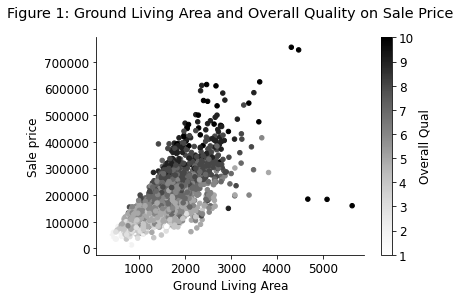

In [79]:
plt.rcParams.update({'font.size': 12})
fig,ax = plt.subplots()
df.plot.scatter(x="Gr Liv Area",y="SalePrice",c="Overall Qual", ax=ax)
ax.set_title("Figure 1: Ground Living Area and Overall Quality on Sale Price", pad=20)
ax.set_xlabel("Ground Living Area")
ax.set_ylabel("Sale price")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [80]:
def cal_pca(n):
    pca = PCA(n_components = n)
    pca.fit(X_train) # components (key for interpreting the new data)
    key_df = pd.DataFrame(pca.components_)
    return pca.explained_variance_ratio_.sum()

lst = {}
for i in range(9):
    lst[i] = cal_pca(i)
    
lst

{0: 0.0,
 1: 0.888427416658098,
 2: 0.9977275192218336,
 3: 0.9999944457809803,
 4: 0.9999972554546563,
 5: 0.999997671236775,
 6: 0.9999979537568963,
 7: 0.9999981774907089,
 8: 0.9999983844408458}

In [8]:
scaler = StandardScaler()
scaler.fit(df.values)
df_std = scaler.transform(df)
df_std.shape

(2930, 32)

In [9]:
def pca_ratio(x):
    pca_std = PCA(n_components = x)
    pca_std.fit(df_std) # components (key for interpreting the new data)
    key_df_std = pd.DataFrame(pca_std.components_)
    return pca_std.explained_variance_ratio_.sum()

lst_std = {}
for i in range(9):
    lst_std[i] = pca_ratio(i)
    
lst_std

{0: 0.0,
 1: 0.1260200473036821,
 2: 0.17227658462502293,
 3: 0.20822360464730127,
 4: 0.2397386908092176,
 5: 0.27513131902075816,
 6: 0.30772514642520166,
 7: 0.3410401219347561,
 8: 0.3755297422195842}

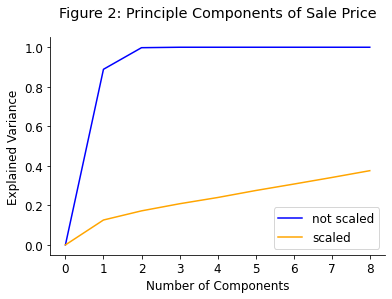

In [81]:
plt.rcParams.update({'font.size': 12})
fig,ax = plt.subplots()
pd.Series(lst).plot.line(c="blue", ax=ax)
pd.Series(lst_std).plot.line(c="orange", ax=ax)
ax.set_title("Figure 2: Principle Components of Sale Price", pad=20)
ax.set_xlabel("Number of Components")
ax.set_ylabel("Explained Variance")
ax.legend(["not scaled","scaled"])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [11]:
y = df['SalePrice']
X = df.drop(["SalePrice"], axis=1)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1, shuffle = 'True')

print('Train/Test sizes:', y_train.shape[0], y_test.shape[0])

Train/Test sizes: 2197 733


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
slope = lr.coef_
intercept = lr.intercept_
slope, intercept

(array([ 1.91161946e+04,  5.04195857e+01,  4.41002027e+01,  3.06887151e+02,
        -1.33914967e+04, -2.99668724e+04,  4.80233741e+03,  3.19147219e+04,
         8.30844548e+03,  3.33126505e+04, -1.28805649e+03,  7.04526360e+00,
        -1.17144415e+03,  5.52955453e+04, -3.83854031e+03, -2.95821947e+04,
        -1.14203536e+04,  4.88957935e+03,  5.31316057e+03, -1.87051869e+04,
        -6.92871040e+02,  6.50596382e+04,  6.52615244e+04, -7.10931665e+03,
        -7.02187358e+03,  7.65148065e+03, -2.98983232e+03,  1.23599750e+04,
         8.02561576e+04,  2.80264378e+04,  3.87650345e+04]),
 -647639.4172441302)

In [13]:
pre_val = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pre_val)))
rmse

0.18540974691453826

In [33]:
poly = PolynomialFeatures(2, include_bias=False) # adding bias twice in fitting
arr = poly.fit_transform(X_train)
poly_df = pd.DataFrame(arr)

In [34]:
lr = LinearRegression()
lr.fit(poly_df, y_train)

LinearRegression()

In [31]:
pre_val = lr.predict(poly.fit_transform(X_test))
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pre_val)))
rmse

0.1718017447117127

In [69]:
poly = PolynomialFeatures(2, include_bias=False) # adding bias twice in fitting
arr = poly.fit_transform(X_train[["Gr Liv Area"]])
poly_df = pd.DataFrame(arr)

lr = LinearRegression()
lr.fit(poly_df, y_train)

fit_x = np.arange(0, 6000, 500).reshape(-1,1)
fit_y = lr.predict(poly.fit_transform(fit_x))

In [70]:
slope = lr.coef_
intercept = lr.intercept_
slope, intercept

(array([ 1.61987503e+02, -1.37313899e-02]), -27063.210345579835)

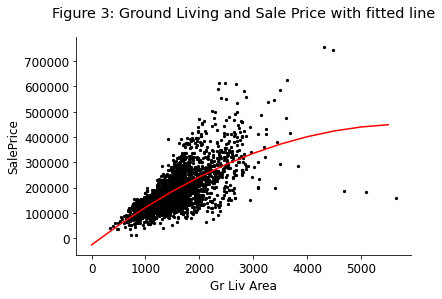

In [92]:
plt.rcParams.update({'font.size': 12})
fig,ax = plt.subplots()
df.plot.scatter(x="Gr Liv Area",y="SalePrice",c="black",s=5, ax=ax)
ax.set_title("Figure 3: Ground Living and Sale Price with fitted line", pad=20)
ax.plot(fit_x, fit_y, "red")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)